In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [51]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [52]:
# Declare Base using 'automap_base()'
Base = automap_base()
# use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [53]:
# print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [54]:
# Assing the measurement class to a variable called 'Measurement and 
# the station class to a variable called 'Station'

Measurement = Base.classes.measurement
Station = Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

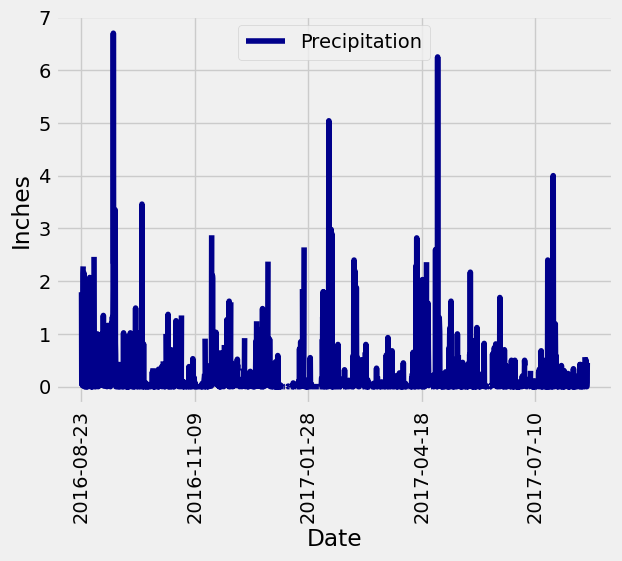

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

results_df = pd.DataFrame(scores, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
results_df = results_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

results_df.plot(x= "Date", y = "Precipitation", color = "darkblue", rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
num_stations =  session.query(func.count(Station.station)).all()
num_stations

[(9,)]

In [83]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations =  session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

stations_df = pd.DataFrame(active_stations, columns = ['Station', 'Number of rows'])
stations_df = stations_df.sort_values('Number of rows', ascending = False)
stations_df


,Station,Number of rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station =  session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg (Measurement.tobs)).\
                        filter(Measurement.station == 'USC00519281')
                 

results= pd.DataFrame(most_active_station, columns = ['Min_temp','Max_temp','AVG_temp'])
results

,Min_temp,Max_temp,AVG_temp
0,54.0,85.0,71.663781


Text(0, 0.5, 'Frecuency')

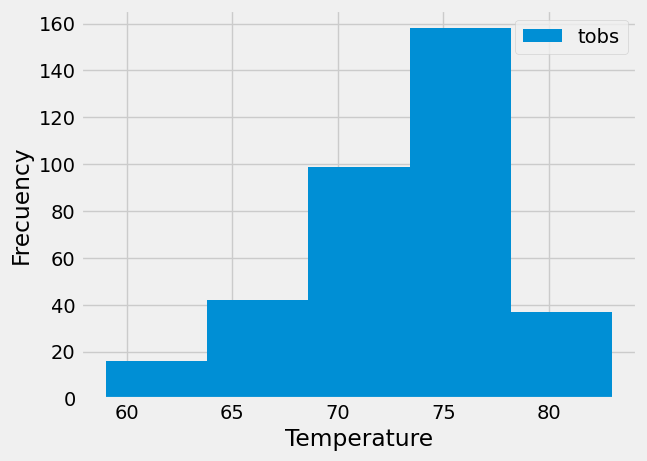

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temperature = """
                    SELECT
                    date,
                    station,
                    tobs
                    FROM
                    measurement
                    WHERE
                    date >= '2016-08-23'
                    and station = 'USC00519281'
                    ORDER BY
                    date ASC;
                    """

temperature_df = pd.read_sql(text(year_temperature), con=engine)
temperature_df.plot(kind = 'hist', bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frecuency")

# Close Session

In [63]:
# Close Session
session.close()